# import libraries

In [2]:
import numpy as np
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import keras
import seaborn as sns
from sklearn import metrics
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img


Using TensorFlow backend.


# load data

In [3]:
os.listdir('chest_xray/train/')

['NORMAL', 'PNEUMONIA']

# Visualize DATA

Text(0.5, 1.0, 'Pnemunia Image')

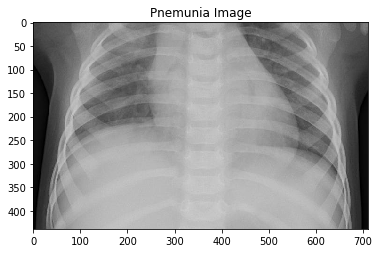

In [27]:
pnemunia  = image.load_img('chest_xray/train/PNEUMONIA/person1_bacteria_1.jpeg')
plt.imshow(pnemunia)
plt.title('Pnemunia Image')

Text(0.5, 1.0, 'Normal Image')

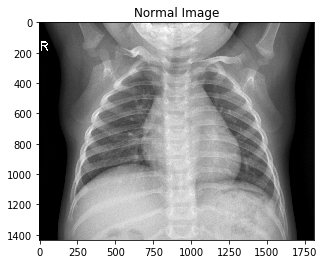

In [4]:
pnemunia  = image.load_img('chest_xray/train/NORMAL/IM-0119-0001.jpeg')
plt.imshow(pnemunia)
plt.title('Normal Image')

# Rescale train, val and test data

In [30]:
train_datagen = ImageDataGenerator(rescale = 1/255)

test_datagen = ImageDataGenerator(rescale = 1/255) 

training_set = train_datagen.flow_from_directory('chest_xray/train/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory('chest_xray/val/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')



Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# CNN MODEL

In [5]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


# Summary

In [6]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3686528   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total para

# Run 10 EPOCHs

In [25]:
cnn_model = cnn.fit_generator(training_set,
                         steps_per_epoch = 150,
                         epochs = 10,
                         validation_data = validation_generator,
                         validation_steps = 200) 

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
150/150 [==============================] - 208s 1s/step - loss: 0.2518 - acc: 0.8977 - val_loss: 0.4851 - val_acc: 0.7500
Epoch 2/10
150/150 [==============================] - 180s 1s/step - loss: 0.1178 - acc: 0.9544 - val_loss: 0.2202 - val_acc: 0.9375
Epoch 3/10
150/150 [==============================] - 141s 943ms/step - loss: 0.0972 - acc: 0.9642 - val_loss: 1.0413 - val_acc: 0.6250
Epoch 4/10
150/150 [==============================] - 144s 959ms/step - loss: 0.0853 - acc: 0.9685 - val_loss: 0.3937 - val_acc: 0.7500
Epoch 5/10
150/150 [==============================] - 142s 949ms/step - loss: 0.0740 - acc: 0.9708 - val_loss: 0.2991 - val_acc: 0.9375
Epoch 6/10
150/150 [==============================] - 143s 957ms/step - loss: 0.0737 - acc: 0.9727 - val_loss: 0.2718 - val_acc: 0.8125
Epoch 7/10
150/150 [==============================] - 141s 938ms/step - loss: 0.0626 - acc: 0.9787 - val_loss: 0.3365 - val_acc: 0.8750
Epoch 

# Test Accuracy

In [31]:
test_accu = cnn.evaluate_generator(test_set,steps=500)

print('The testing accuracy is :',test_accu[1]*100, '%')



The testing accuracy is : 71.15384615384616 %


# Save Weights

In [32]:
cnn.save_weights("chestmodel.h5")

# Training and Validation Loss

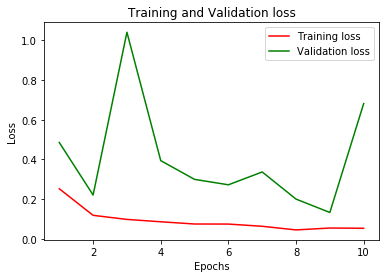

In [34]:
loss = cnn_model.history['loss']
val_loss = cnn_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Training And Validation Accuracy 

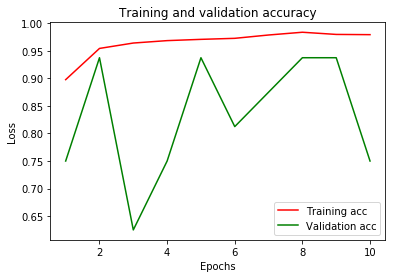

In [35]:
acc = cnn_model.history['acc']
val_acc = cnn_model.history['val_acc']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Load test image to pridict

In [33]:
from keras.preprocessing import image
from PIL import Image
test_image = image.load_img('chest_xray/test/PNEUMONIA/person89_bacteria_440.jpeg')
test_image = test_image.resize((64, 64), Image.ANTIALIAS)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

In [40]:
pridict = cnn.predict_classes(test_image)

In [44]:
if pridict[0][0]==1:
    print("Xray has PNEUMONIA")
else:
    print("Xray is NORMAL")

Xray has PNEUMONIA
